<a href="https://www.kaggle.com/code/arunmunagala/regressor-using-avocado-prices-v-1-1?scriptVersionId=112122772" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/avocado-prices/avocado.csv


In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [3]:
data_path="/kaggle/input/avocado-prices/avocado.csv"
data=pd.read_csv(data_path)

In [4]:
y=data.AveragePrice

check for null values


In [5]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
predictor=data.drop(['AveragePrice'],axis=1)

Dropping dates due to my lack of experience with parsing

In [7]:
predictor=data.drop(['Date'],axis=1)

removing all object data types to prevent issues in numerical regression

In [8]:
X=predictor.select_dtypes(exclude=['object'])

In [9]:
X.isnull().any().sum()

0

Apparently there are no missing values

In [10]:
X.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015


In [11]:
X=X.drop(['Unnamed: 0'],axis=1)

In [12]:
X.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015


Above is the final dataset to be used in the Forest Regressr

In [13]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


visualizing data a bit

visualiztion for a smaller range

In [14]:
datav=X.iloc[1:10]

Text(0, 0.5, 'no of large bags')

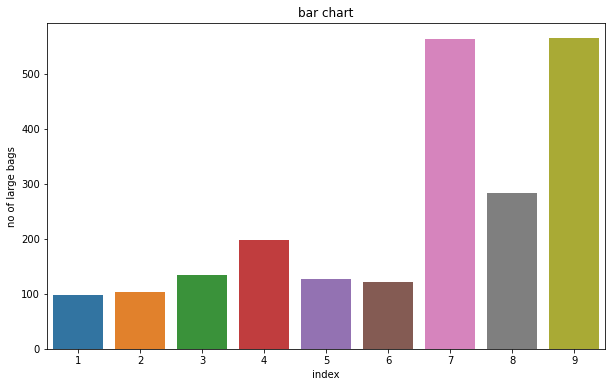

In [15]:
plt.figure(figsize=(10,6))
plt.title('bar chart')
sns.barplot(x=datav.index,y=datav['Large Bags'])
plt.xlabel('index')
plt.ylabel('no of large bags')

In [16]:
datav=data.iloc[1:10]

In [17]:
features=['Total Volume','Total Bags','4046','Small Bags','Large Bags','XLarge Bags','year']

In [18]:
X_final=X[features]

train test splitting

In [19]:
x_train,x_valid,y_train,y_valid=train_test_split(X_final,y,train_size=0.75,test_size=0.25,random_state=0)

defining the model to be used for the datset

In [20]:
model=RandomForestRegressor

In [21]:
model=RandomForestRegressor(random_state=1)

In [22]:
model.fit(x_train,y_train)

RandomForestRegressor(random_state=1)

In [23]:
predict=model.predict(x_valid)

In [24]:
mae=mean_absolute_error(predict,y_valid)


In [25]:
print("Validation MAE for Random Forest Model", mae)

Validation MAE for Random Forest Model 0.14034174884944114


In [26]:
output=pd.DataFrame({'original':y_valid,'predicted':predict})

In [27]:
output

,original,predicted
9181,1.48,1.6150
1013,1.05,1.0266
14625,1.27,1.1175
15234,2.15,1.5432
18247,1.93,1.5614
...,...,...
11529,1.78,1.6577
6684,1.48,1.4156
16235,2.08,2.0343
17754,1.55,1.3163


this feels wrong. I'll work on it in future iterations.

lets goooo I fixed it